In [ ]:
#updating altair
!pip install --upgrade altair

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: altair
    Found existing installation: altair 4.2.2
    Uninstalling altair-4.2.2:
      Successfully uninstalled altair-4.2.2


In [ ]:
#importing libraries
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
from vega_datasets import data

In [ ]:
#reading the air pollution data
data1 = pd.read_csv('https://media.githubusercontent.com/media/Hamza-chao/CS625_Project/main/uspollution_pollution_us_2000_2016.csv')

In [ ]:
#changing the Date Local column to only years column
data1['Date Local'] = pd.to_datetime(data1['Date Local'], format='%Y-%m-%d')
data1['Date Local'] =data1['Date Local'].dt.year

In [ ]:
#reading the commute mode data
data2 = pd.read_csv('https://media.githubusercontent.com/media/Hamza-chao/CS625_Project/main/Commute_mode.csv')
data2

,State,Mode,Year,Commute mode share (percent)
0,United States,Bicycle,2016,0.005745
1,United States,Walked,2016,0.027175
2,United States,"Taxi, motorcycle, or other",2016,0.012219
3,United States,Public transportation,2016,0.050867
4,United States,Worked at home,2016,0.050485
...,...,...,...,...
5039,Wyoming,"Taxi, motorcycle, or other",2000,0.009000
5040,Wyoming,Public transportation,2000,0.020000
5041,Wyoming,Worked at home,2000,0.039000
5042,Wyoming,Carpool,2000,0.099000


In [ ]:
data2 = data2.pivot_table('Commute mode share (percent)',['State','Year'],'Mode')
data2['green modes'] = data2['Bicycle'] + data2['Carpool'] + data2['Public transportation'] + data2['Taxi, motorcycle, or other'] + data2['Walked'] + data2['Worked at home']
data2 = data2.reset_index()
data2

Mode,State,Year,Bicycle,Carpool,Drove alone,Public transportation,"Taxi, motorcycle, or other",Walked,Worked at home,green modes
0,Alabama,2000,NaN,0.123000,0.830000,0.005000,0.008000,0.013000,0.021000,NaN
1,Alabama,2004,0.002000,0.097000,0.854000,0.005000,0.009000,0.010000,0.023000,0.146000
2,Alabama,2005,0.000934,0.108826,0.839629,0.004311,0.011967,0.011967,0.022367,0.160371
3,Alabama,2006,0.000669,0.112769,0.836068,0.004555,0.009833,0.011201,0.024905,0.163932
4,Alabama,2007,0.001023,0.112167,0.833733,0.004221,0.010299,0.013059,0.025498,0.166267
...,...,...,...,...,...,...,...,...,...,...
723,Wyoming,2012,0.011800,0.115559,0.757484,0.015314,0.012174,0.032454,0.055214,0.242516
724,Wyoming,2013,0.007831,0.108313,0.770565,0.015314,0.015266,0.045664,0.037046,0.229435
725,Wyoming,2014,0.009402,0.110303,0.768019,0.016148,0.012454,0.035678,0.047994,0.231981
726,Wyoming,2015,0.006170,0.100148,0.773100,0.021970,0.010700,0.045943,0.041969,0.226900


In [ ]:
#summing the the pollutant into one column called Pollutants Mean
data11 = data1[['State','Date Local','CO Mean','O3 Mean','NO2 Mean','SO2 Mean']].groupby(['State','Date Local']).mean()
data11['Pollutants Mean'] = data11.iloc[:,2:].mean(axis=1)
data11 = data11.reset_index()
#chart coding
input_dropdown = alt.binding_select(options=data11['State'].drop_duplicates().to_numpy(), name='Air Quality Across States:  ')
selection = alt.selection_point(fields=['State'], bind=input_dropdown, value='Virginia')

title = alt.Title(alt.expr(f'{selection.name}.State+ " Air Quality Analysis: Pollutant Trends 2000-2016"'))

gases = alt.Chart(data11, title=title).mark_line().encode(
    x='Date Local:Q',
    y='Pollutants Mean:Q',
).add_params(
    selection
).transform_filter(
    selection
)

In [ ]:
#reading popdata from 2000 to 2010
data2000 = pd.read_csv('https://media.githubusercontent.com/media/Hamza-chao/CS625_Project/main/2000-2010.csv')
#reading popdata from 2010 to 2016
data2016 = pd.read_csv('https://media.githubusercontent.com/media/Hamza-chao/CS625_Project/main/2010-2016.csv')
#selecting data of all age groups and races
data2000 = data2000[(data2000['SEX'] ==0) & (data2000['ORIGIN'] ==0) & (data2000['RACE'] ==0) & (data2000['AGEGRP'] ==0)]
#merging the datasets from 2000 to 2016
popdata = data2000.merge(data2016,left_on="NAME", right_on="NAME")
#droping unnecessary columns
popdata = popdata.drop('REGION_x', axis=1)
popdata = popdata.drop('DIVISION_x', axis=1)
popdata = popdata.drop('STATE_x', axis=1)
popdata = popdata.drop('SEX', axis=1)
popdata = popdata.drop('ORIGIN', axis=1)
popdata = popdata.drop('RACE', axis=1)
popdata = popdata.drop('AGEGRP', axis=1)
popdata = popdata.drop('ESTIMATESBASE2000', axis=1)
popdata = popdata.drop('DIVISION_y', axis=1)
popdata = popdata.drop('STATE_y', axis=1)
popdata = popdata.drop('SUMLEV', axis=1)
popdata = popdata.drop('CENSUS2010POP', axis=1)
popdata = popdata.drop('REGION_y', axis=1)
popdata = popdata.drop('ESTIMATESBASE2010', axis=1)
popdata = popdata.drop('POPESTIMATE2001', axis=1)
popdata = popdata.drop('POPESTIMATE2002', axis=1)
popdata = popdata.drop('POPESTIMATE2003', axis=1)
popdata = popdata.drop('POPESTIMATE2010_x', axis=1)
#renaming the columns
popdata = popdata.rename(columns={'POPESTIMATE2000':'2000','POPESTIMATE2004':'2004','POPESTIMATE2005':'2005','POPESTIMATE2006':'2006','POPESTIMATE2007':'2007','POPESTIMATE2008':'2008','POPESTIMATE2009':'2009','POPESTIMATE2010_y':'2010','POPESTIMATE2011':'2011','POPESTIMATE2012':'2012','POPESTIMATE2013':'2013','POPESTIMATE2014':'2014','POPESTIMATE2015':'2015','POPESTIMATE2016':'2016'})
modes = pd.DataFrame()
#this loop is for making the popdata ready to merge it with the commute mode data
for state in data2['State'].drop_duplicates():
    ala = popdata[popdata['NAME']==state].set_index('NAME').T.reset_index()
    ala['index'] =  ala['index'].astype(int)
    ala2 = data2[data2['State']==state].merge(ala,left_on="Year", right_on="index")
    #multiplying the popdata of the same year with the green modes percentages of the same year of the same state for normalization
    ala2[state] = ala2['green modes'] * ala2[state]
    #concatinating all these results together into modes variable
    modes = pd.concat([modes,ala2])

#switching all the columns genererated by the loop into rows to make it ready for the chart selection dropdown menu
modes = modes.apply(lambda x: pd.Series(x.dropna().values))
modes = modes.drop(['State','index','Bicycle','Carpool','Drove alone','Public transportation','Taxi, motorcycle, or other','Walked','Worked at home','green modes'], axis=1)
modes = modes.dropna()
modes = modes.set_index('Year').unstack().reset_index()
modes = modes.rename({ 0: 'Population of green modes', 'level_0': 'States'}, axis=1)
#chart coding
input_dropdown = alt.binding_select(options=modes['States'].drop_duplicates().to_numpy(), name='Green Commutes Across States:  ')
selection = alt.selection_point(fields=['States'], bind=input_dropdown, value='Virginia')

title = alt.Title(alt.expr(f' "Mean Population\'s Usage of Sustainable Transportation in " +{selection.name}.States+ "(2000-2016)"'))

trans = alt.Chart(modes, title=title).mark_line().encode(
    x='Year',
    y= alt.Y('Population of green modes')
).add_params(
    selection
).transform_filter(
    selection
)

In [ ]:
trans | gases

alt.HConcatChart(...)

In [ ]:
#merging the commute data with population data
data3=data1.groupby(['Date Local','State'], as_index=False).agg({ 'CO AQI':'mean','O3 AQI':'mean','NO2 AQI':'mean','SO2 AQI':'mean'})
data3=data3.pivot_table(['CO AQI','O3 AQI','NO2 AQI','SO2 AQI'],['State','Date Local'])
data3= data3.reset_index().groupby('State').agg({ 'CO AQI':'mean','O3 AQI':'mean','NO2 AQI':'mean','SO2 AQI':'mean'})
popdata['avg_pop'] = popdata.iloc[:,1:].mean(axis=1)
popdata = popdata.melt(value_vars=['2000','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'],id_vars='NAME')
popdata = popdata.astype({'variable': 'int32'})
poludata = data1.groupby(['State','Date Local'], as_index=False).agg({ 'CO AQI':'mean','O3 AQI':'mean','NO2 AQI':'mean','SO2 AQI':'mean'})
mergeddata = data2.merge(poludata,left_on=['State','Year'],right_on=['State','Date Local'])
mergeddata = mergeddata.merge(popdata,right_on=['NAME','variable'],left_on=['State','Year'])
mergeddata[['Bicycle','Carpool','Drove alone','Public transportation','Taxi, motorcycle, or other','Walked','Worked at home']] = mergeddata[['Bicycle','Carpool','Drove alone','Public transportation','Taxi, motorcycle, or other','Walked','Worked at home']].multiply(mergeddata["value"], axis="index")

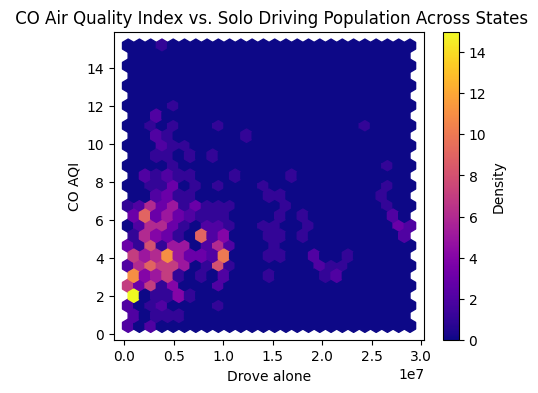

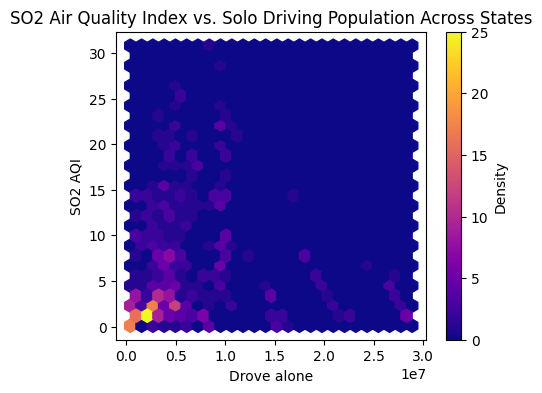

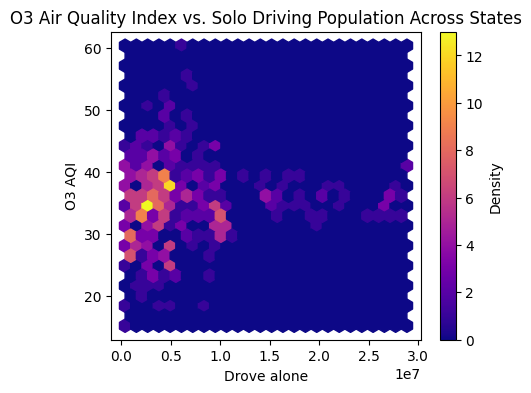

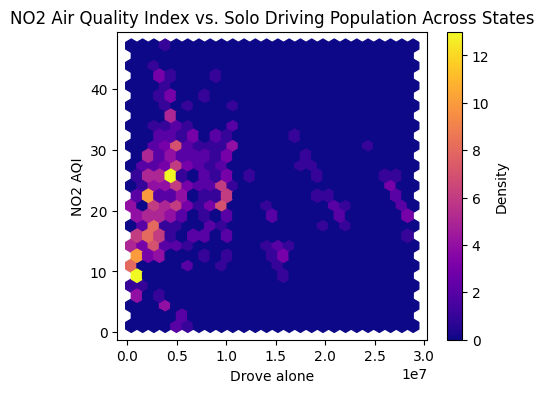

In [ ]:
#chart coding
def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(5, 4))
    hb = ax.hexbin(x_data, y_data, gridsize=25, cmap='plasma')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    plt.show()

generate_hexbin_plot(mergeddata['Drove alone'], mergeddata['CO AQI'], 'Drove alone', 'CO AQI', ' CO Air Quality Index vs. Solo Driving Population Across States')
generate_hexbin_plot(mergeddata['Drove alone'], mergeddata['SO2 AQI'], 'Drove alone', 'SO2 AQI', 'SO2 Air Quality Index vs. Solo Driving Population Across States')
generate_hexbin_plot(mergeddata['Drove alone'], mergeddata['O3 AQI'], 'Drove alone', 'O3 AQI', 'O3 Air Quality Index vs. Solo Driving Population Across States')
generate_hexbin_plot(mergeddata['Drove alone'], mergeddata['NO2 AQI'], 'Drove alone', 'NO2 AQI', 'NO2 Air Quality Index vs. Solo Driving Population Across States')

In [ ]:
#reading state codes dataset and merging it with commute modes dataset for a geo plot
data21 = data2.groupby(['State','Year']).mean()
data21 = data21.groupby('State').mean().reset_index()
codes = pd.read_csv('https://media.githubusercontent.com/media/Hamza-chao/CS625_Project/main/state_codes.csv',sep=';')
codes = codes.rename(columns={"State": "States"})
codes = data21.merge(codes,left_on='State',right_on='Official Name State')
codes[['Bicycle','Carpool','Drove alone','Public transportation','Taxi, motorcycle, or other','Walked','Worked at home']] = (codes[['Bicycle','Carpool','Drove alone','Public transportation','Taxi, motorcycle, or other','Walked','Worked at home']].apply(lambda x: x*100))
codes = codes[['Official Name State','Bicycle','Carpool','Drove alone','Public transportation','Taxi, motorcycle, or other','Walked','Worked at home','State','Official Code State']]

In [ ]:
#preparing the data to make it ready for dropdown selection menu on the chart
data4 = data1.groupby(['Date Local','State'], as_index=False).agg({ 'NO2 AQI':'mean','O3 AQI':'mean', 'SO2 AQI':'mean', 'CO AQI':'mean','State Code':'max'})[['State Code','State','O3 AQI','SO2 AQI', 'NO2 AQI', 'CO AQI']].melt(id_vars=['State Code','State'],value_vars=['NO2 AQI', 'CO AQI', 'O3 AQI', 'SO2 AQI'])
#reading states geographic data
states = alt.topo_feature(data.us_10m.url, feature='states')

#chart coding
input_dropdown = alt.binding_select(options=list(data4.variable.unique()), name='variable ')
selector = alt.selection_point(fields=['variable'], bind=input_dropdown)

base = alt.Chart(states).mark_geoshape(fill='lightgray', stroke='black', strokeWidth=0.5)
title = alt.Title(alt.expr(f'{selection.name}.variable'))
chart = alt.Chart(data4, title = 'State-wise Air Quality Index Mapping for NO2, SO2, O3, and CO Pollutants').mark_geoshape(stroke='black').encode(
    color='value:Q',
    tooltip=['State:N', 'variable:N','value:Q'],

).transform_lookup(
    lookup='State Code',
    from_=alt.LookupData(states, key='id', fields=['geometry', 'type'])
).add_params(
    selector
).transform_filter(
    selector
).properties(
    width=700,
    height=400,
    projection={'type': 'albersUsa'},
)

(base + chart).configure_view(stroke=None).configure_title(fontSize=20)

alt.LayerChart(...)

In [ ]:
#melting the data to make it ready for dropdown selection menu on the chart
codes = codes.melt(id_vars=['Official Code State','Official Name State'] ,value_vars=['Bicycle','Carpool','Drove alone','Public transportation','Taxi, motorcycle, or other','Walked','Worked at home' ])
states = alt.topo_feature(data.us_10m.url, feature='states')

#chart coding
input_dropdown = alt.binding_select(options=list(codes.variable.unique()), name='Commute modes ')

selector = alt.selection_point(fields=['variable'], bind=input_dropdown)

base = alt.Chart(states).mark_geoshape(fill='lightgray', stroke='black', strokeWidth=0.5)

chart = alt.Chart(codes, title = 'Percentage of Different Commute Modes Across States').mark_geoshape(stroke='black').encode(
    color='value:Q',
    tooltip=['Official Name State:N', 'variable:N','value:Q'],
).transform_lookup(
    lookup='Official Code State',
    from_=alt.LookupData(states, key='id', fields=['geometry', 'type'])
).add_params(
    selector
).transform_filter(
    selector
).properties(
    width=700,
    height=400,
    projection={'type': 'albersUsa'},
)

(base + chart).configure_view(stroke=None).configure_title(fontSize=20)

alt.LayerChart(...)